# How to Load and Explore Time Series Data in Python
The Pandas library in Python provides excellent, built-in support for time series data.

Once loaded, Pandas also provides tools to explore and better understand your dataset.

In this post, you will discover how to load and explore your time series dataset.

After completing this tutorial, you will know:

* How to load your time series dataset from a CSV file using Pandas.
* How to peek at the loaded data and calculate summary statistics.
* How to plot and review your time series data.

Let’s get started.

## Daily Female Births Dataset
In this post, we will use the Daily Female Births Dataset as an example.

This univariate time series dataset describes the number of daily female births in California in 1959.

The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988).

Below is a sample of the first 5 rows of data, including the header row.

In [ ]:
"Date","Daily total female births in California, 1959"
"1959-01-01",35
"1959-01-02",32
"1959-01-03",30
"1959-01-04",31
"1959-01-05",44

Below is a plot of the entire dataset taken from Data Market.

![daily-female-births](Daily-Female-Births-Dataset.png)

You can [download the dataset from this website](https://datamarket.com/data/set/235k/daily-total-female-births-in-california-1959#!ds=235k&display=line).

Download the dataset and place it in your current working directory with the file name **“daily-total-female-births-in-cal.csv“.**

## Load Time Series Data
Pandas represented time series datasets as a Series.

A Series is a one-dimensional array with a time label for each row.

We can load the Daily Female Births dataset directly using the Series class as follows:

In [1]:
# Load birth data
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


The series has a name, which is the column name of the data column.

You can see that each row has an associated date. This is in fact not a column, but instead a time index for value. As an index, there can be multiple values for one time, and values may be spaced evenly or unevenly across times.

The main function for loading CSV data in Pandas is the read_csv() function. We can use this to load the time series as a Series object, instead of a DataFrame, as follows:

In [2]:
# Load birth data using read_csv
from pandas import read_csv
series = read_csv('daily-total-female-births-in-cal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


Note the arguments to the **read_csv()** function.

We provide it a number of hints to ensure the data is loaded as a Series.

* **header=0**: We must specify the header information at row 0.
* **parse_dates=[0]**: We give the function a hint that data in the first column contains dates that need to be parsed. This argument takes a list, so we provide it a list of one element, which is the index of the first column.
* **index_col=0**: We hint that the first column contains the index information for the time series.
* **squeeze=True**: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

One more argument you may need to use for your own data is **date_parser** to specify the function to parse date-time values. In this example, the date format has been inferred, and this works in most cases. In those few cases where it does not, specify your own date parsing function and use the **date_parser** argument.

## Exploring Time Series Data
Pandas also provides tools to explore and summarize your time series data.

In this section, we’ll take a look at a few, common operations to explore and summarize your loaded time series data.

### Peek at the Data
It is a good idea to take a peek at your loaded data to confirm that the types, dates, and data loaded as you intended.

You can use the **head()** function to peek at the first 5 records or specify the first n number of records to review.

For example, you can print the first 10 rows of data as follows.

In [4]:
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.head(10))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Daily total female births in California, 1959, dtype: int64


You can also use the **tail()** function to get the last **n** records of the dataset.

### Number of Observations
Another quick check to perform on your data is the number of loaded observations.

This can help flush out issues with column headers not being handled as intended, and to get an idea on how to effectively divide up data later for use with supervised learning algorithms.

You can get the dimensionality of your Series using the **size** parameter.

In [5]:
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.size)

366


Running this example we can see that as we would expect, there are 366 observations, one for each day of the year in 1959.

### Descriptive Statistics
Calculating descriptive statistics on your time series can help get an idea of the distribution and spread of values.

This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling.

The **describe()** function creates a 7 number summary of the loaded time series including mean, standard deviation, median, minimum, and maximum of the observations.

In [8]:
from pandas import Series
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
print(series.describe())

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64


Running this example prints a summary of the birth rate dataset.

### Plotting Time Series
Plotting time series data, especially univariate time series, is an important part of exploring your data.

This functionality is provided on the loaded Series by calling the **plot()** function.

Below is an example of plotting the entire loaded time series dataset.

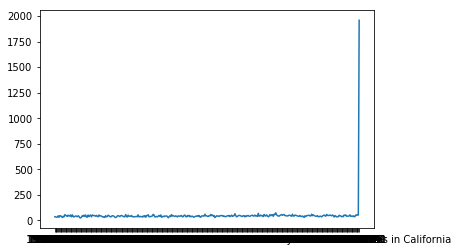

In [9]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=0)
pyplot.plot(series)
pyplot.show()

Running the example creates a time series plot with the number of daily births on the y-axis and time in days along the x-axis.

## Further Reading
If you’re interested in learning more about Pandas’ functionality working with time series data, see some of the links below.

* [Pandas Time Series / Date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)
* [Pandas Time Series Basics](https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/)
* [Time series analysis with pandas](http://earthpy.org/pandas-basics.html)

## Summary
In this post, you discovered how to load and handle time series data using the Pandas Python library.

Specifically, you learned:

* How to load your time series data as a Pandas Series.
* How to peek at and calculate summary statistics of your time series data.
* How to plot your time series data.